In [2]:
#from fairseq.models.roberta import CamembertModel
import pandas as pd
import bamboolib
from tqdm.notebook import tqdm
from utils import f
#from utils import camembert_embedding

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [ ]:
import pandas as pd

data = pd.read_excel(
    "/Users/charlesdedampierre/Desktop/SciencePo Projects/shaping-ai/labeling/SHAI-LABELS-ROUND-1.xlsx"
)

data["bindex"] = data.index
data = data.sample(10)
data = data.reset_index(drop=True)

In [ ]:
from multiprocessing import Pool

In [8]:
import numpy as np

In [9]:
with Pool(8) as p:
        res = p.map(f, np.arange(1,100))

In [10]:
with Pool(5) as p:
        res = p.map(camembert_embedding,  data['title_lead'].to_list())

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [17]:
camembert = CamembertModel.from_pretrained('/Volumes/OutFriend/camembert/camembert-base/')

In [ ]:
#tqdm(list, total = len(list))

In [104]:
def camembert_embedding(list):
    
    embeddings = []
    for sentence in list:

        # Extract the last layer's features
        tokens = camembert.encode(sentence)
        last_layer_features = camembert.extract_features(tokens)[0].detach().numpy() 

        # The sentence is the mean of the embeddings
        embedding = pd.DataFrame(last_layer_features).mean()
        embeddings.append(embedding)
    
    
    return embeddings

In [86]:
# how to do parallel computing

In [87]:
import multiprocessing
a_pool = multiprocessing.Pool()

In [96]:
embeddings = camembert_embedding(data['title_lead'].to_list())

  0%|          | 0/10 [00:00<?, ?it/s]

In [1]:
from utils import f
from utils import camembert_embedding

In [6]:
from multiprocessing import Pool

In [ ]:

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

In [99]:
import multiprocess as mp

def f(x):
    return x*x

with mp.Pool(5) as pool:
    print(pool.map(f, [1, 2, 3, 4, 5]))

[1, 4, 9, 16, 25]


In [105]:
import multiprocess as mp

with mp.Pool(8) as pool:
    res = pool.map(camembert_embedding, data['title_lead'].to_list())

Process ForkPoolWorker-40:
Process ForkPoolWorker-37:
Process SpawnPoolWorker-142:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process SpawnPoolWorker-144:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/

KeyboardInterrupt: 

In [ ]:
#embeddings = camembert_embedding(data['title_lead'])

In [72]:
import plotly.express as px
from sklearn.cluster import KMeans

In [73]:
def wrap_by_word(string, n_words):
    """returns a string where \\n is inserted between every n words"""
    try:
        a = string.split()
        ret = ""
        for i in range(0, len(a), n_words):
            ret += " ".join(a[i : i + n_words]) + "<br>"
    except:
        pass

    return ret

In [74]:
def make_bubble(emb, data, text_var, n_clusters=20, width=1000, height=1000):

    print("UMAP Reduction...")
    X_embedded_fit = umap.UMAP(n_components=2).fit_transform(emb)

    df_emb = pd.DataFrame(X_embedded_fit, columns=["dim_1", "dim_2"])

    df_emb["clusters"] = (
        KMeans(n_clusters=n_clusters).fit(X_embedded_fit).labels_.astype(str)
    )
    df_emb[text_var] = data[text_var].apply(lambda x: wrap_by_word(x, 10))

    fig = px.scatter(
        df_emb,
        x="dim_1",
        y="dim_2",
        color="clusters",
        hover_data=[text_var],
        width=width,
        height=height,
    )

    return fig

In [77]:
fig = make_bubble(embeddings, data.reset_index(drop=True), text_var= 'title_lead', n_clusters=3, width=1000, height=1000)

UMAP Reduction...


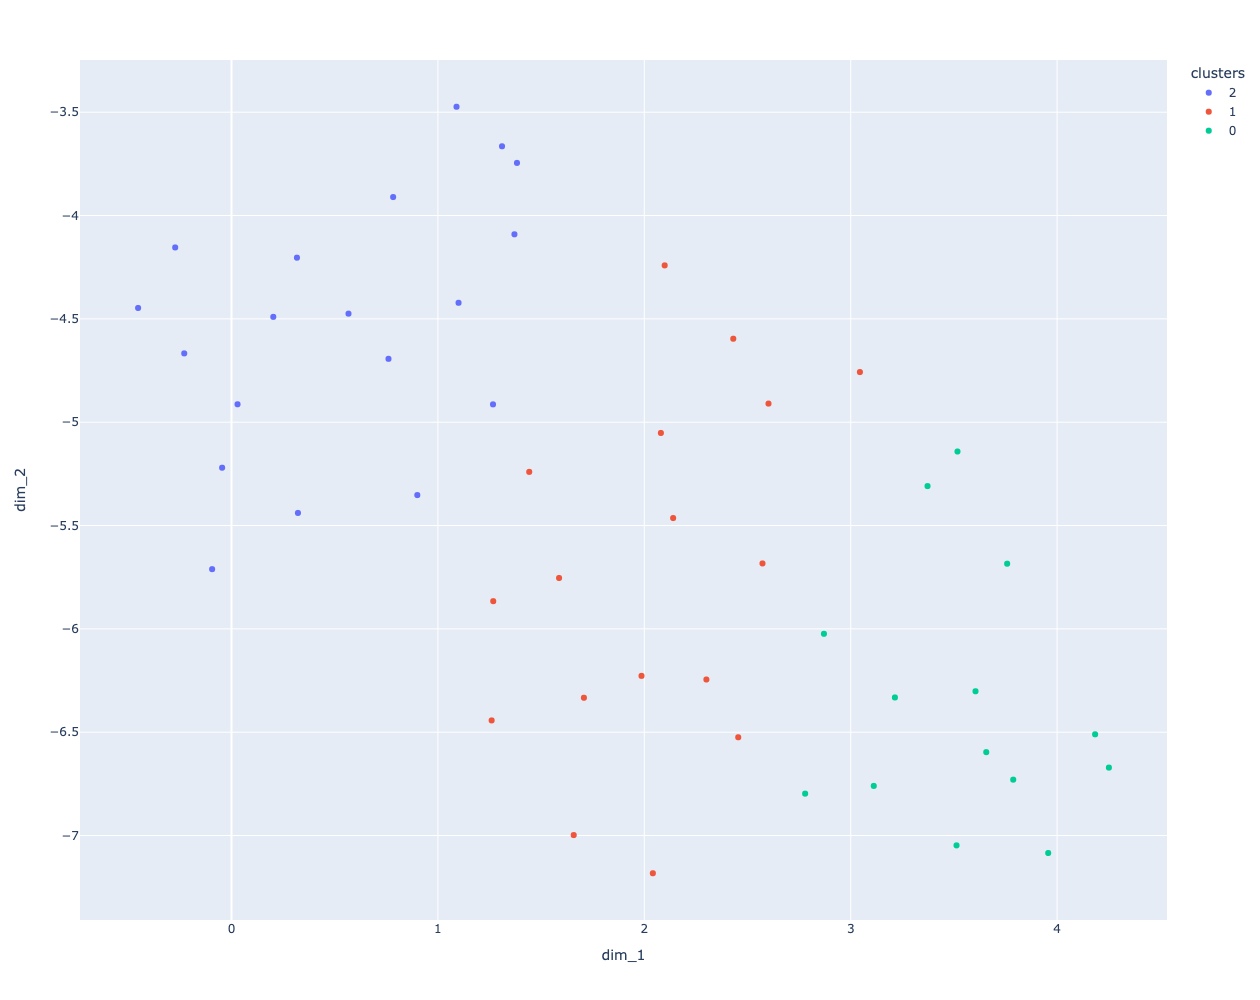

In [78]:
fig.show()